In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

## Load the Datasets In

The explanations of the variables: 

* Star98: http://www.statsmodels.org/stable/datasets/generated/star98.html
* Fair: http://www.statsmodels.org/stable/datasets/generated/fair.html

In [3]:
df = sm.datasets.star98.load_pandas().data
display(df.head())
star98_df = df

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


In [4]:
df = sm.datasets.fair.load_pandas().data
display(df.head())
fair_df = df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## The Relationships of Pairs – `corrcoef` + `heatmap`

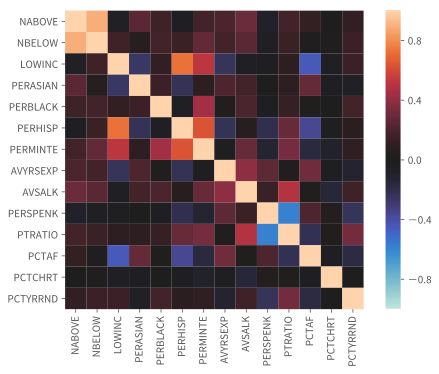

In [5]:
df = star98_df
df = df.iloc[:, :14]  # all rows and 0th to 13rd columns
df = df.corr()
sns.heatmap(df,
            vmax=1, center=0, vmin=-1,
            square=True)

- Pearson correlation coefficient.
    - = 0: no linear relationship.
    - \> 0.3: weak.
    - \> 0.5: moderate.
    - \> 0.7: strong.
    - = 1: perfect.
    - Can be negative linear relationship.

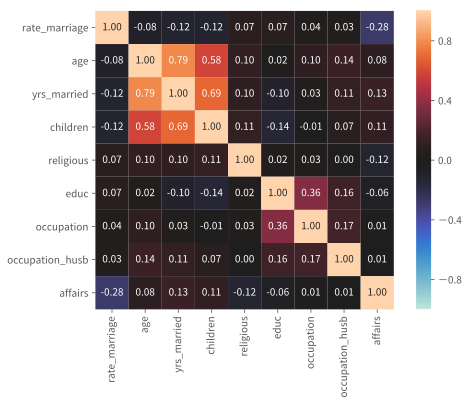

In [6]:
df = fair_df
df = df.corr(method='kendall')
sns.heatmap(df,
            vmax=1, center=0, vmin=-1,
            square=True,
            annot=True, fmt='.2f')

## Star98

### The Distribution of Variable –  `distplot`

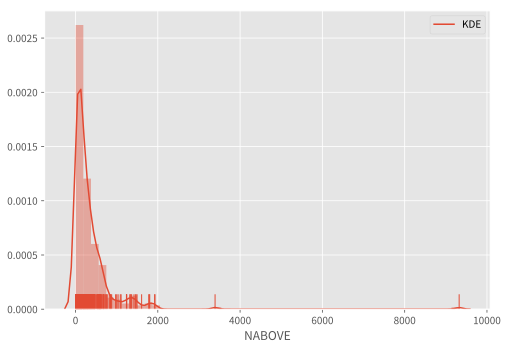

In [7]:
sns.distplot(
    star98_df.NABOVE,
    rug=True,
    kde_kws={'label': 'KDE'},
)

* x: the values.
* y: the percentage, and the univariate kernel density estimate (univariate KDE).

### Adjust Plotting Interactively – `plt`

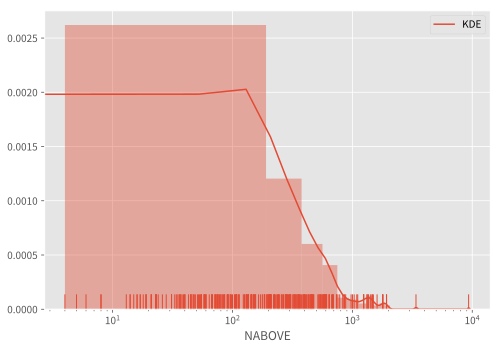

In [8]:
plt.xscale('log')
sns.distplot(
    star98_df.NABOVE,
    rug=True,
    kde_kws={'label': 'KDE'},
)

### The X-Y Relationship – `regplot`

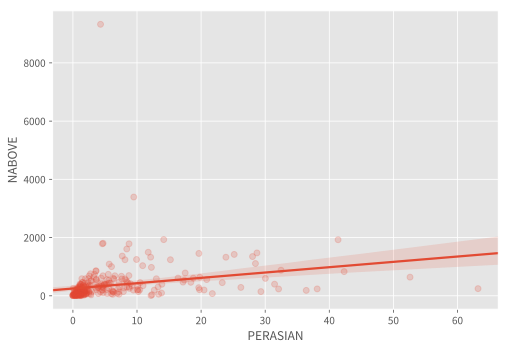

In [9]:
sns.regplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    scatter_kws={'alpha': 0.2},
)

* Can x predict y?

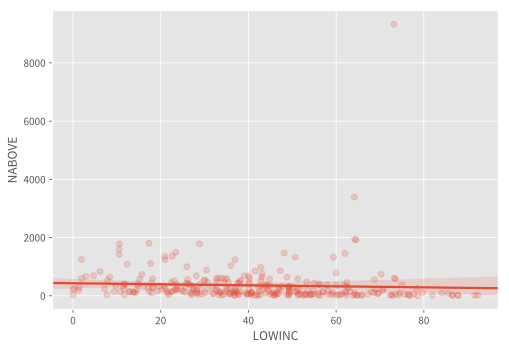

In [10]:
sns.regplot(
    data=star98_df,
    x='LOWINC', y='NABOVE',
    scatter_kws={'alpha': 0.2},
)

### The Relationships of Pairs + Distributions – `pairplot`

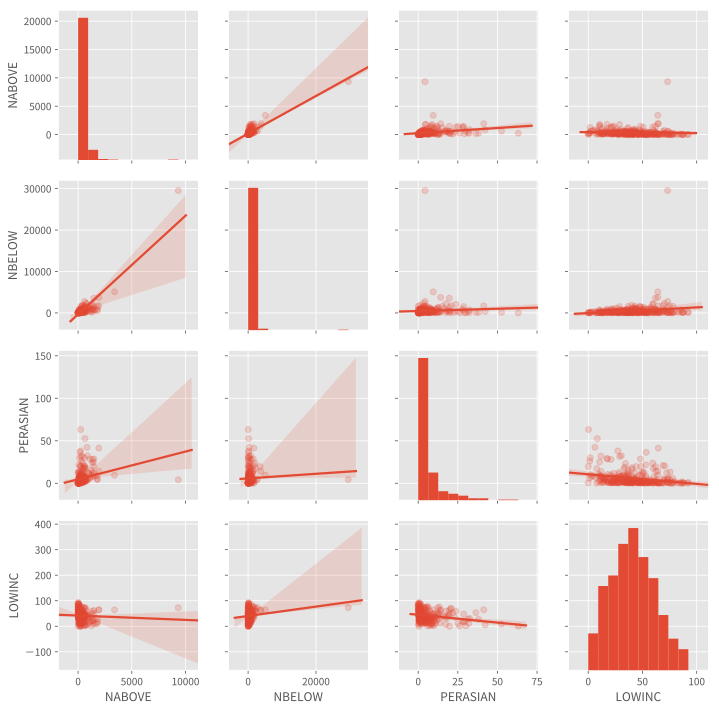

In [11]:
sns.pairplot(
    data=star98_df,
    vars=['NABOVE', 'NBELOW', 'PERASIAN', 'LOWINC'],
    kind='reg',
    plot_kws=dict(scatter_kws={'alpha': 0.2}),
)

### The Bivariate Relationship + Distributions – `jointplot`

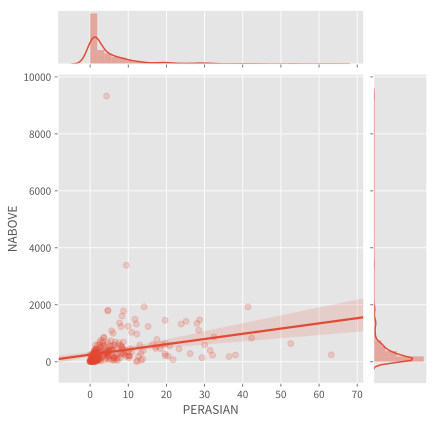

In [12]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='reg',
    joint_kws=dict(scatter_kws={'alpha': 0.2}),
)

## Fair

### The Overview of Variables – `boxplot`

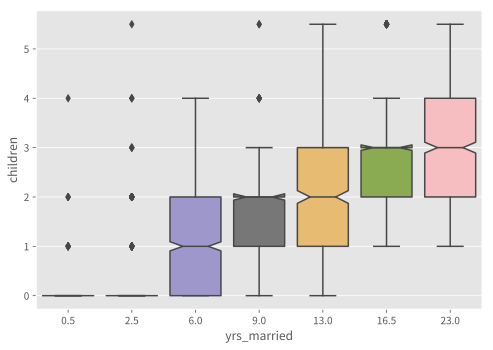

In [13]:
sns.boxplot(
    data=fair_df,
    x='yrs_married',
    y='children',
    notch=True
)

* Box: $Q_1$ to $Q_3$ = 25th to 75th percentile = middle 50% of data.
* Line: the median = the 50th percentile.
* Whiskers:
    * $ Q_1 - 1.5 IQR $, where $ IQR = Q_3 - Q_1 $.
    * $ Q_3 + 1.5 IQR $.
    * = middle 99.3% if data follow a normal distribution.
* Points: out of middle 99.3% if data follow a normal distribution, may be outliers.
* Notch: $ median \pm 1.57\dfrac{IQR}{\sqrt{n}} $ = 95% confidence interval for the median.
    * The 95% confidence interval for the median also can be bootstrapped.
    * The 95% confidence interval also can be “for mean” in other plots.
    * If the notches don't overlap, may be different significantly.

### The Boxplots + Kernel Density Estimates – `violinplot`

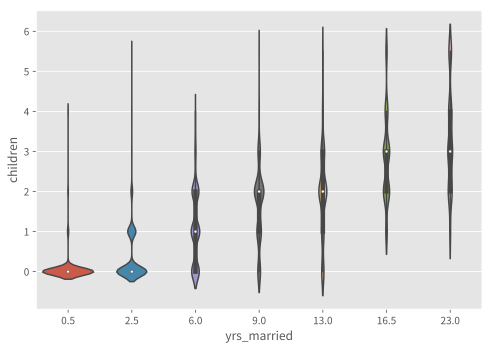

In [14]:
sns.violinplot(
    data=fair_df,
    x='yrs_married',
    y='children',
)

### The Faster Violinplot – `lvplot`

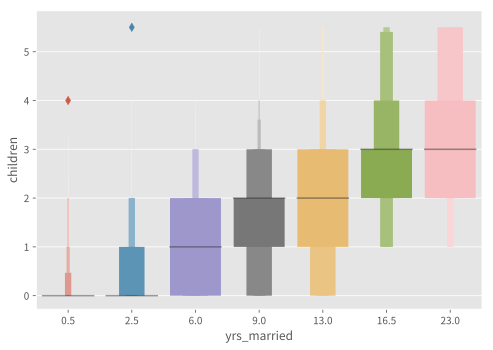

In [15]:
sns.boxenplot(
    data=fair_df,
    x='yrs_married',
    y='children',
)

### The Point Estimates + Confidence Intervals – `barplot`

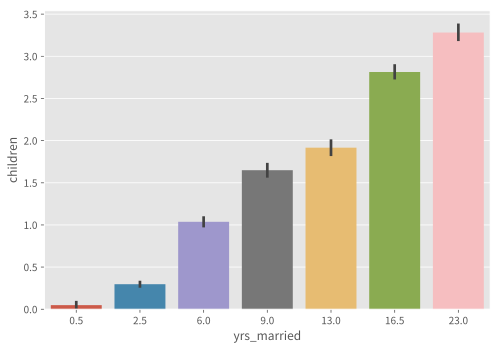

In [16]:
sns.barplot(
    data=fair_df,
    x='yrs_married',
    y='children',
)

* The height of a rectangle: an estimate of the mean from Gaussian-based asymptotic approximation by default.
* The bar: the 95% confident interval of the estimate with 1,000 bootstrap iterations by default.
    * If the bars don't overlap, significant.

### The Categorical Plots on Grid – `catplot`

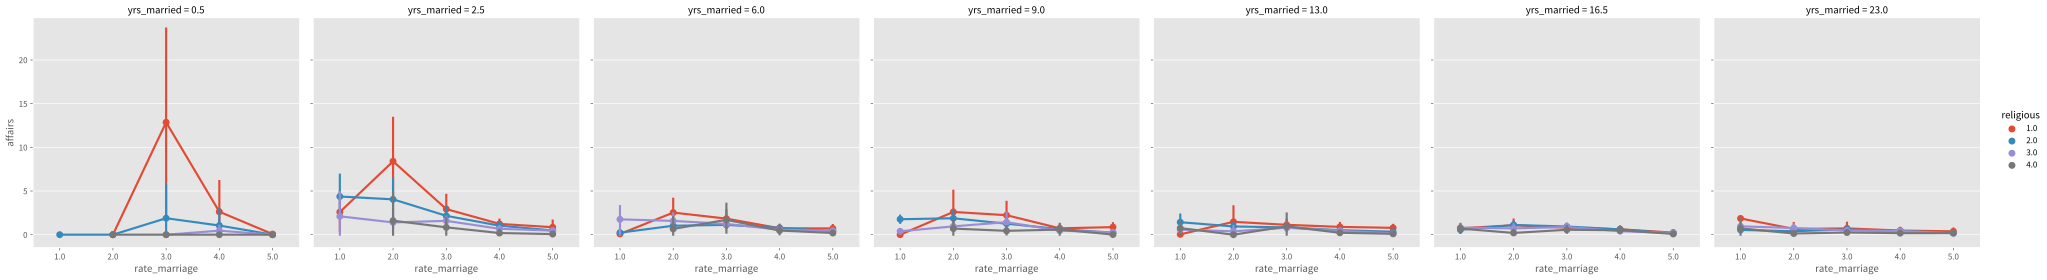

In [17]:
sns.catplot(
    data=fair_df,
    y='affairs',
    x='rate_marriage',
    hue='religious',
    col='yrs_married',
    kind='point',
)

## Dig More

* [API reference – seaborn](http://seaborn.pydata.org/api.html)
* [Plotting commands summary – matplotlib](https://matplotlib.org/api/pyplot_summary.html)
* [Boxplot - matplotlib](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)
* [Notched Box Plots – David's Statistics](https://sites.google.com/site/davidsstatistics/home/notched-box-plots)
* [Pearson correlation coefficient – Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
* [P-value – Wikipedia](https://en.wikipedia.org/wiki/P-value)